# Webscrapping using BeautifulSoup

Web scraping is an automatic method to obtain large amounts of data from websites. In this Capstone, I will do web scraping exchange rate US Dollar (USD) To Indonesian Rupiah (IDR) from https://www.exchange-rates.org/history/IDR/USD/T

![](assets/USD.jpeg)

## Indonesian Rupiah (IDR) per US Dollar (USD)

Through the website, data on the Rupiah to USD exchange rate for a period of 180 days starting from October 10th, 2022 to April 7th, 2023 can be obtained, and a summary graph of the exchange rate movement during that period is generated. It is observed that the Rupiah to USD exchange rate has decreased during the 180-day period, and the average exchange rate during this period is Rp 15,382.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. In this scrapping, we get key table containing class table. Then we beautify the results we want to see using the `.prettify()`

In [5]:
table = soup.find('tbody')
print(table.prettify()[:500])

<tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-04-07">
    April 7, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">
    2023-4-7
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     14,941
    </span>
   </span>
   <span class="n">
    <span class="nowrap"


In [6]:
table.find_all('a', attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-04-07">2023-4-7</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-06">2023-4-6</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-05">2023-4-5</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-04">2023-4-4</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-04-03">2023-4-3</a>]

In [7]:
table.find_all('a', attrs={'class':'n'})[0].text

'2023-4-7'

Finding row length.

In [8]:
row = table.find_all('a', attrs={'class':'n'})
row_length = len(row)
row_length

130

Do the scrapping process to scrap the information. First we initialize a tuple and name it with the temp variable. Then we will make a loop from one to the length of the table row, which we will find all the cells of column one and two are date and kurs. then we will add it to the tuple we have created.

In [9]:
temp = [] #init

for i in range(0, row_length):
    
    #get date 
    date = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get kurs
    kurs = table.find_all('span', attrs={'class':'w'})[i].text
    kurs = kurs.strip() #to remove excess white space
    
    temp.append((date,kurs)) 
    
temp 

[('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = Rp15,322'),
 ('2023-3-1', '$1 = Rp15,249'),
 ('2023-2-28', '$1 = Rp15,241'),
 ('2023-2-27', '$1 = Rp15,216'),
 ('2023-2-24', '$1 = R

It can be seen, that the results obtained start from the most recent date. We will change the order from oldest to newest date using `::-1`

In [10]:
temp = temp[::-1]
temp

[('2022-10-10', '$1 = Rp15,321'),
 ('2022-10-11', '$1 = Rp15,354'),
 ('2022-10-12', '$1 = Rp15,319'),
 ('2022-10-13', '$1 = Rp15,372'),
 ('2022-10-14', '$1 = Rp15,472'),
 ('2022-10-17', '$1 = Rp15,441'),
 ('2022-10-18', '$1 = Rp15,474'),
 ('2022-10-19', '$1 = Rp15,587'),
 ('2022-10-20', '$1 = Rp15,562'),
 ('2022-10-21', '$1 = Rp15,537'),
 ('2022-10-24', '$1 = Rp15,598'),
 ('2022-10-25', '$1 = Rp15,533'),
 ('2022-10-26', '$1 = Rp15,503'),
 ('2022-10-27', '$1 = Rp15,560'),
 ('2022-10-28', '$1 = Rp15,557'),
 ('2022-10-31', '$1 = Rp15,624'),
 ('2022-11-1', '$1 = Rp15,674'),
 ('2022-11-2', '$1 = Rp15,685'),
 ('2022-11-3', '$1 = Rp15,790'),
 ('2022-11-4', '$1 = Rp15,615'),
 ('2022-11-7', '$1 = Rp15,685'),
 ('2022-11-8', '$1 = Rp15,638'),
 ('2022-11-9', '$1 = Rp15,692'),
 ('2022-11-10', '$1 = Rp15,520'),
 ('2022-11-11', '$1 = Rp15,474'),
 ('2022-11-14', '$1 = Rp15,554'),
 ('2022-11-15', '$1 = Rp15,557'),
 ('2022-11-16', '$1 = Rp15,639'),
 ('2022-11-17', '$1 = Rp15,714'),
 ('2022-11-18', '$1 =

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(temp,columns=['Date','Kurs'])
df.head()

,Date,Kurs
0,2022-10-10,"$1 = Rp15,321"
1,2022-10-11,"$1 = Rp15,354"
2,2022-10-12,"$1 = Rp15,319"
3,2022-10-13,"$1 = Rp15,372"
4,2022-10-14,"$1 = Rp15,472"


After that, we will remove ($ , 1 = , Rp) string and the comma to change the kurs data type to float

In [12]:
# to get rid of the string '$'
df['Kurs'] = df['Kurs'].str.replace('$','')

# to get rid of the string '1 ='
df['Kurs'] = df['Kurs'].str.replace('1 =','')

# to get rid of the string 'Rp'
df['Kurs'] = df['Kurs'].str.replace('Rp','')

# to get rid of the string ','
df['Kurs'] = df['Kurs'].str.replace(',','')

df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10020\4109681693.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Kurs'] = df['Kurs'].str.replace('$','')


,Date,Kurs
0,2022-10-10,15321
1,2022-10-11,15354
2,2022-10-12,15319
3,2022-10-13,15372
4,2022-10-14,15472


In [13]:
# check data types
df.dtypes

Date    object
Kurs    object
dtype: object

In [14]:
# to change the data type in columns Date to datetime64
df['Date'] = df['Date'].astype('datetime64')

# to change the data type in columns Kurs to float
df['Kurs'] = df['Kurs'].astype('float')

df.dtypes

Date    datetime64[ns]
Kurs           float64
dtype: object

We will create a new column containing month and year to get the mean so that it can be visualized by month category

In [15]:
# make new column to get contain month
df['Month'] = df['Date'].dt.to_period('M')
df.head()

,Date,Kurs,Month
0,2022-10-10,15321.0,2022-10
1,2022-10-11,15354.0,2022-10
2,2022-10-12,15319.0,2022-10
3,2022-10-13,15372.0,2022-10
4,2022-10-14,15472.0,2022-10


In [16]:
# using groupby to get mean in every month
df_mean = df.groupby('Month').mean().round(2)
df_mean

C:\Users\ACER\AppData\Local\Temp\ipykernel_10020\175397962.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Month').mean().round(2)


,Kurs
Month,
2022-10,15488.38
2022-11,15652.68
2022-12,15580.14
2023-01,15244.68
2023-02,15158.40
2023-03,15281.70
2023-04,14942.20


## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

After we get the average exchange rate from each month, then we will make a visualization using `.plot`

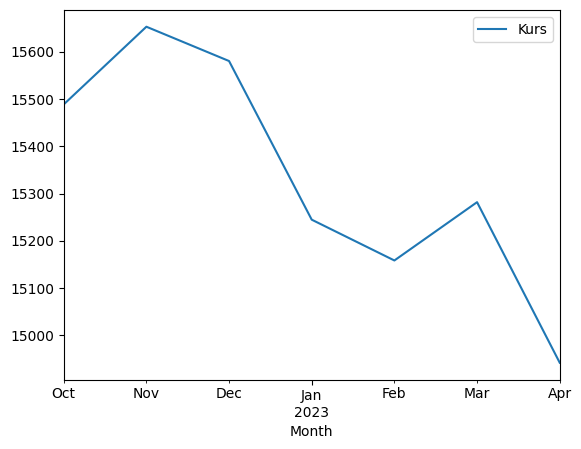

In [17]:
df_mean.plot();

## Conclusion
The chart illustrates that the dollar to rupiah exchange rate has a downward trend from October 2022-April 2023. Although there was an increase in the exchange rate in February 2023, the exchange rate declined again in March-April 2023. The conclusion is that the dollar exchange rate from October 2022 to April 2023 has decreased.

The depreciation of the dollar exchange rate against the rupiah can have several negative impacts. The government should make efforts to keep the rupiah exchange rate stable and strengthen it against the dollar exchange rate.


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`